In [1]:
#시리즈만들기
#시리즈 속성
#시리즈 인덱싱,슬라이싱
#시리즈 연산
#시리즈 CRUD
#시리즈 통계
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
sr = pd.Series( [90,90,55,60,76,80,76,88,30,25],
               name="국어점수" )
sr.index=['홍길동','이순신','임꺽정','정난정',
         '이이','이황','정도전','김철수1',
          '김철수2','김철수3']
sr

홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [ ]:
( 연습문제 )
1. 국어점수가 가장큰값을 구하시요
2. 국어점수가 가장큰값의 이름을 구하시요
3. 국어점수가 80점이상인 값을 구하시요
4. 국어 점수가 50점이상 80점이하인
값을 구하시요
5. 이름이 김으로 시작하는 데이터를
구하시요
6. 국어점수의 평균을 구하시요
7. 국어점수의 총합을 구하시요
8. 국어점수의 표준편차를 구하시요
9. 국어점수가 40점이하인 데이터를 삭제하시요
10. 국어점수가 50점이상인 데이터에 가산점 10%를 
미만인경우는 20%를 부여하시요
11. 국어점수 top 5를 구하시요
12. 국어점수가 50점이상인 데이터의 바차트를 그리시요
13. 국어점수의 범위(0~50,50~70,70~100)별 돗수를 구하시요 
( 범위, 0~50,50~70,70~100)
14. 아래처럼 출력하시요(70점이상 합격 미만 불합격)
========================
이름     국어   합격여부
=========================
홍길동   90      합격
이순신   90      합격
....

In [3]:
#1.
sr.max()

90

In [7]:
#2.
mx = sr.max()
sr[sr == mx].index

Index(['홍길동', '이순신'], dtype='object')

In [9]:
#3. 국어점수가 80점이상인 값을 구하시요
sr[sr>=80]

홍길동     90
이순신     90
이황      80
김철수1    88
Name: 국어점수, dtype: int64

In [11]:
#4. 국어 점수가 50점이상 80점이하인 값을 구하시요
sr[(sr>=50) &(sr<=80)]

임꺽정    55
정난정    60
이이     76
이황     80
정도전    76
Name: 국어점수, dtype: int64

In [15]:
#5. 이름이 김으로 시작하는 데이터를 구하시요
sr[sr.index.str.contains('^김')]

김철수1    88
김철수2    30
김철수3    25
Name: 국어점수, dtype: int64

In [16]:
#6.6. 국어점수의 평균을 구하시요
sr.mean()

67.0

In [17]:
#7. 국어점수의 총합을 구하시요
sr.sum()

670

In [18]:
# 8. 국어점수의 표준편차를 구하시요
sr.std()

23.935097428021656

In [22]:
# 9. 국어점수가 40점이하인 데이터를 삭제하시요
sr1 = sr[sr<=40]
print(sr1)
sr.drop(sr1.index)

김철수2    30
김철수3    25
Name: 국어점수, dtype: int64


홍길동     90
이순신     90
임꺽정     55
정난정     60
이이      76
이황      80
정도전     76
김철수1    88
Name: 국어점수, dtype: int64

In [24]:
# 10. 국어점수가 50점이상인 데이터에 가산점 10%를 
# 미만인경우는 20%를 부여하시요
sr.apply(lambda v:v*1.1 if v>=50 else v*1.2)

홍길동     99.0
이순신     99.0
임꺽정     60.5
정난정     66.0
이이      83.6
이황      88.0
정도전     83.6
김철수1    96.8
김철수2    36.0
김철수3    30.0
Name: 국어점수, dtype: float64

In [25]:
# 11. 국어점수 top 5를 구하시요
sr.nlargest(5)

홍길동     90
이순신     90
김철수1    88
이황      80
이이      76
Name: 국어점수, dtype: int64

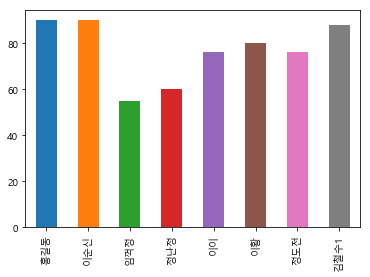

In [27]:
# 12. 국어점수가 50점이상인 데이터의 바차트를 그리시요
sr1 = sr[sr>= 50]
sr1.plot(kind='bar')

In [29]:
# 13. 국어점수의 범위(0~50,50~70,70~100)별 돗수를 구하시요 
# ( 범위, 0~50,50~70,70~100)
pd.cut( sr, [0,50,70,100])

홍길동     (70, 100]
이순신     (70, 100]
임꺽정      (50, 70]
정난정      (50, 70]
이이      (70, 100]
이황      (70, 100]
정도전     (70, 100]
김철수1    (70, 100]
김철수2      (0, 50]
김철수3      (0, 50]
Name: 국어점수, dtype: category
Categories (3, interval[int64]): [(0, 50] < (50, 70] < (70, 100]]

In [31]:
pd.cut( sr, [0,50,70,100]).value_counts()

(70, 100]    6
(50, 70]     2
(0, 50]      2
Name: 국어점수, dtype: int64

In [ ]:
14. 아래처럼 출력하시요(70점이상 합격 미만 불합격)
========================
이름     국어   합격여부
=========================
홍길동   90      합격
이순신   90      합격
....

In [37]:
for i, v in sr.items():
    print(i, v, '합격' if v>=70 else '불합격', sep='\t')

홍길동	90	합격
이순신	90	합격
임꺽정	55	불합격
정난정	60	불합격
이이	76	합격
이황	80	합격
정도전	76	합격
김철수1	88	합격
김철수2	30	불합격
김철수3	25	불합격
